In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

import pickle

In [4]:
class Component:
    def __init__(self):
        self.chain = []
    
    def add_edge(self, edge):
        if len(self.chain) == 0:
            self.chain.append(edge[0])
            self.chain.append(edge[1])
            return True
        elif edge[0] == self.chain[-1]:
            self.chain.append(edge[1])
            return True
        elif edge[1] == self.chain[0]:
            self.chain.insert(0, edge[0])
            return True
        else:
            return False
        
        
    def allow_edge(self, edge):
        if len(self.chain) == 0:
            return True
        elif not edge[0] in self.chain[:-1] and not edge[1] in self.chain[1:] \
            and not (edge[0] == self.chain[-1] and edge[1] == self.chain[0]):
            return True
        else:
            return False
    
    def require_edge(self, edge):
        if not self.allow_edge(edge):
            return False
        if edge[0] == self.chain[-1]:
            return True
        if edge[1] == self.chain[0]:
            return True
        
    def merge(self, component):
        if component.chain[0] == self.chain[-1]:
            self.chain.extend(component.chain[1:])
            return True
        elif component.chain[-1] == self.chain[0]:
            new_chain = component.chain
            new_chain.extend(self.chain[1:])
            self.chain = new_chain
            return True
        else:
            return False
        
    def __str__(self):
        return str(self.chain)
    
    def __repr__(self):
        return str(self.chain)

In [5]:
c = Component()

In [57]:
def restore_arrays(graph, components, threashold = 0, name = 0):
    #name = 0
    #done = False

    
    for argmax in graph.flatten().argsort()[::-1]:
        edge = (argmax // graph.shape[0], argmax % graph.shape[0])
        if graph[edge[0], edge[1]] > threashold:
        #print(edge, len(components))
            if len(components) == 0:
                c = Component()
                c.add_edge(edge)
                components[name] = c
                name += 1
                #break
            else:
                if all([comp.allow_edge(edge) for comp in components.values()]):
                    require_names = [name for name in components if components[name].require_edge(edge)]
                    #print("rn", require_names)
                    if len(require_names) == 0:
                        c = Component()
                        c.add_edge(edge)
                        components[name] = c
                        name += 1
                        #break
                    elif len(require_names) == 1:
                        components[require_names[0]].add_edge(edge)
                        #break
                    elif len(require_names) == 2:
                        components[require_names[0]].add_edge(edge)
                        components[require_names[0]].merge(components[require_names[1]])
                        components.pop(require_names[1])
                        #break
    weights = []
    comps_as_list = []
    
    for comp in components.values():
        comps_as_list.append(comp.chain)
        curr_weights = []
        for a,b in zip(comp.chain, comp.chain[1:]):
            curr_weights.append(graph[a][b])
        weights.append(curr_weights)
        
    return comps_as_list, weights
    

In [62]:
def comp_to_gr(components, spacers_num, o_gr = None):
    gr = np.zeros((spacers_num, spacers_num))
    
    for k in components.keys():
        for a,b in zip(components[k].chain, components[k].chain[1:]):
            if not o_gr is None:
                if o_gr[a][b] > 0:
                    gr[a][b] = 1
            else:
                gr[a][b] = 1
    
    return gr

In [58]:
def plot_gr(gr, start=0, end=-1, log = False, all_ticks = False,  s=10):
    plt.figure(figsize=(s,s))
    if end == -1:
        end = gr.shape[0]
    if log:
        plt.imshow(np.log(gr[start:end,start:end] + 1))
    else:
        plt.imshow(gr[start:end,start:end])
    plt.colorbar()
    if all_ticks: 
        plt.xticks(np.arange(start,end))
        plt.yticks(np.arange(start,end))
    plt.show()

In [59]:
def plot_group(*args, s = 7):
    n = len(args) // 2
    
    plt.figure(figsize=(s,s))
    f, a = plt.subplots(1, n,figsize=(s,s))
    #f.set_figsize((s,s))
    for i in range(n):
        im = args[2*i]
        if args[2*i + 1]:
            im = np.log(im + 1)
        a[i].imshow(im)

    plt.show()

In [60]:
def a_in_b(a,b):
    a = np.array(a)
    b = np.array(b)
    if len(a) > len(b):
        return False
    else:
        for i in range(len(b) - len(a) + 1):
            if all(b[i:i + len(a)] == a):
                return True
    return False

In [61]:
m =  np.zeros((5,5))
m[0,1] = 1
m[1,2] = 1
#m[2,0] = 1
m[4,3] = 1
m[0,4] = 1

## Simple greedy

add headiest, non-cycle, no tree edge

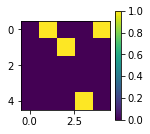

In [70]:
plot_gr(m, s = 2)

In [73]:
c = {}
arrays, weights = restore_arrays(m, c)

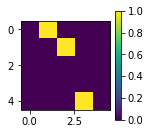

In [69]:
used_edges = comp_to_gr(c, 5)
plot_gr(used_edges, s = 2)

In [111]:
def elongate_chain(gr, chain):
    suggested_edges = []
    argmax = np.argmax(gr[:, chain[0]])
    if gr[argmax, chain[0]] > 0:
        return argmax
    else:
        return -1
    
def elongate_chains(gr, chains):
    for chain in chains: 
        suggested = elongate_chain(gr, chain)
        if suggested != -1:
            print([suggested] + chain)
        else:
            print(chain)

## Checks

In [94]:
gr = np.load("../../data/graphs/ES3_22.npy")[:35,:35]

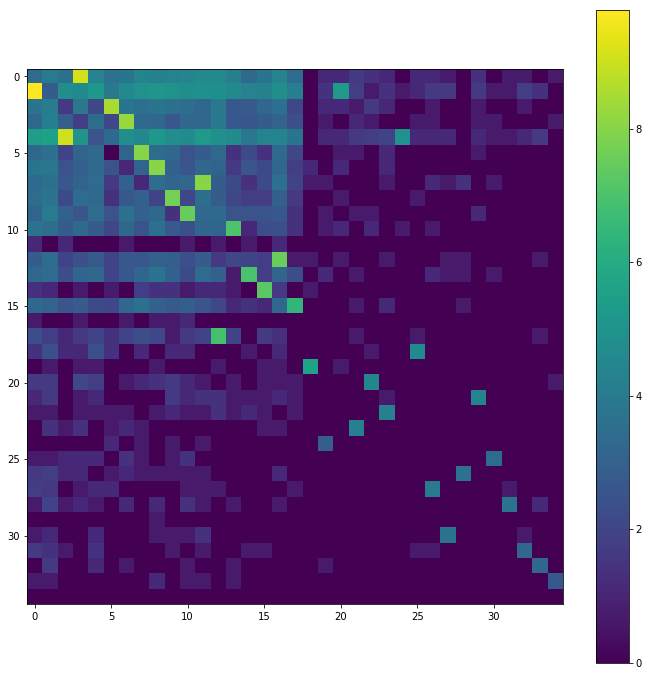

In [115]:
plot_gr(gr, log = 1, s = 12)

In [96]:
c = {}
arrays, weights = restore_arrays(gr, c)

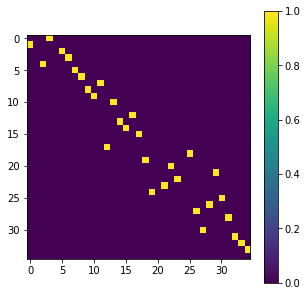

In [108]:
used_edges = comp_to_gr(c, 35)
plot_gr(used_edges, s = 5)

In [109]:
arrays

[[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 [4, 2, 5, 7, 11],
 [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 [20, 22, 23, 21, 29]]

In [114]:
elongate_chains(gr, arrays)

[4, 1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16]
[1, 4, 2, 5, 7, 11]
[4, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34]
[1, 20, 22, 23, 21, 29]


In [116]:
gr[:,1]

array([ 58.,  17.,  62.,  67., 270.,  34.,  45.,  36.,  40.,  58.,  32.,
         0.,  30.,  29.,   2.,  21.,   0.,   5.,  10.,   1.,   4.,   4.,
         1.,   3.,   0.,   1.,   5.,   4.,   6.,   0.,   2.,   3.,   4.,
         1.,   0.])

In [117]:
gr[4,24]

138.0

In [118]:
gr[1,20]

191.0

In [19]:
gr_Sasha = np.load("../../data/graphs/ES3_22.npy")[:35, :35]

In [34]:
components = {}
name = 0

In [35]:
name = next_edge(gr_ES, components, name)
print(components, name)

{0: [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16], 1: [4, 2, 5, 7, 11], 5: [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34], 6: [20, 22, 23, 21, 29]} 10


In [16]:
weights = []

for a, b in zip(components[0].chain, components[0].chain[1:]):
    weights.append(gr_ES[a][b])

In [17]:
weights

[8568.0,
 4956.0,
 2941.0,
 3059.0,
 0.0,
 18.0,
 289.0,
 102.0,
 30.0,
 42.0,
 52.0,
 38.0,
 42.0,
 24.0,
 24.0,
 14.0,
 0.0,
 86.0,
 69.0,
 69.0,
 77.0,
 0.0,
 17455.0,
 9224.0,
 3815.0,
 3022.0,
 2268.0,
 1809.0,
 1174.0,
 1067.0,
 1432.0,
 619.0,
 1019.0,
 1845.0]

In [81]:
gr = np.load("../../data/graphs/Sasha_22.npy")

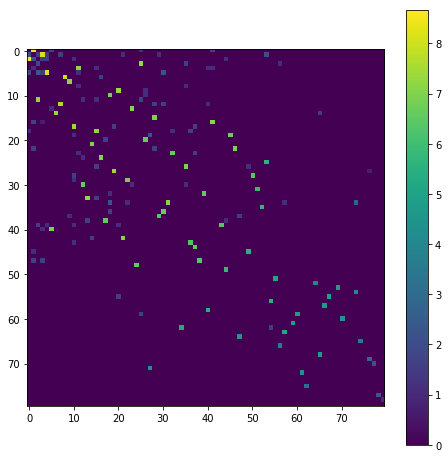

In [84]:
plot_gr(gr, log = 1,s=8)

In [91]:
gr.max()

5807.0

In [86]:
es_solve = solve_gready(gr)[0]


In [89]:
c = {}
next_edge(gr, c)

21

In [90]:
c

{0: [58, 40, 5, 4, 11, 2, 0, 1, 3, 25, 53, 69, 76],
 2: [42, 21, 14, 6, 8],
 3: [33, 13, 23, 32, 39, 43, 36, 30, 12, 7, 9, 20, 26, 35, 52, 64, 47, 38, 17, 10, 18, 15, 28, 50],
 6: [71, 27, 19, 45, 49, 44, 37, 29, 22, 46],
 9: [48, 24, 16, 41],
 11: [75, 62, 34, 31, 51, 55, 67],
 16: [63, 57, 66, 56, 54, 73],
 18: [68, 65, 74],
 19: [72, 61, 59, 60, 70, 77, 78, 79]}

In [41]:
es_gr = np.load("../../data/graphs/ES3_22.npy")[:34, :34]

In [42]:
es_solve = solve_gready(es_gr)[0]

es_solve[11,24] = 0
es_solve[29,4] = 0
es_solve[33,1] = 0

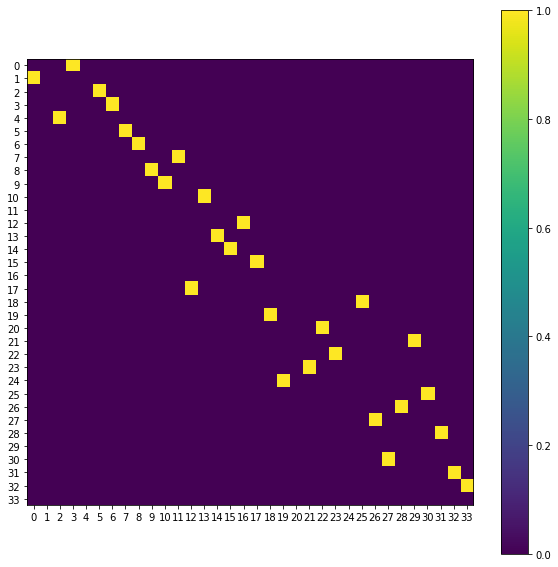

In [43]:
plot_gr(es_solve, s = 10, all_ticks=1)

## SYNth data

In [11]:
import json

In [37]:
#synthetic_populations = np.load("../../data/simulation/simple1k/populations.npy")
y = np.load("../../data/simulation/1000_35_like_true/populations_gr.npy")[:, :32, :32]
X = np.load("../../data/simulation/1000_35_like_true/amp_gr.npy")[:, :32 ,:32]

#params = json.load(open("../../data/simulation/simple1k//params.json", 'r'))

In [21]:
def solve_gready(inp_gr):
    spacers_num = inp_gr.shape[0]
    components = {}
    name = 0
    
    name = next_edge(inp_gr, components, name)
    
    return comp_to_gr(components, spacers_num, inp_gr), components

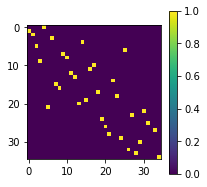

In [17]:
plot_gr(solve_gready(X[-1])[0], s = 3)

In [38]:
from sklearn.metrics import log_loss, accuracy_score, f1_score, classification_report

In [39]:
loss = 0
for i in range(200):
    loss += accuracy_score(y[i + 800].flatten() > 0, (solve_gready(X[i+800])[0]).flatten() > 0.5)
    if loss != 1:
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [40]:
loss / 200

0.9985400390625

In [51]:
answ = np.zeros((200, 32,32))
for i in range(200):
    answ[i] = ((solve_gready(X[i+800])[0]) > 0.5).astype(int)


In [25]:
f1_score((y[800:] > 0.5).flatten(), answ.flatten())

0.8760229845028731

In [53]:
print(classification_report((y[800:] > 0).flatten(), answ.flatten()))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00    199514
       True       0.99      0.95      0.97      5286

avg / total       1.00      1.00      1.00    204800



In [50]:
log_loss(y[-1], solve_gready(X[-1]))

A Jupyter Widget

8.271161533457453e-15

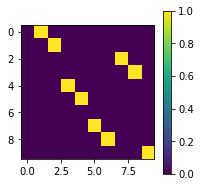

In [60]:
plot_gr(solve_gready(X[0+800]), s =3)

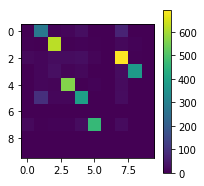

In [62]:
plot_gr(X[0+800], s =3)

## SlO

In [41]:
gr = np.load("../../data/graphs/SlO_22_cut_at_10.npy")

In [42]:
gr_answ, comps = solve_gready(gr)

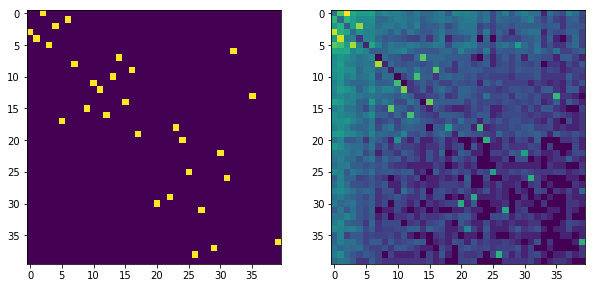

In [27]:
plot_group(gr_answ[:40,:40],0, gr[:40,:40], 1, s = 10)

In [59]:
len(comps)

104

In [62]:
sum([len(x.chain) for x in comps.values()])

639

In [68]:
chain = comps[2].chain

In [69]:
weights = []
for i,j in zip(chain[:-1] , chain[1:]):
    weights.append(gr[i,j])

Text(0,0.5,'Log weight')

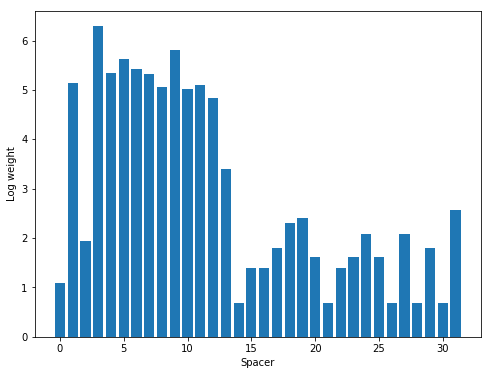

In [70]:
plt.figure(figsize = (8, 6))
plt.bar(np.arange(len(weights)), np.log(np.array(weights) + 1), label = 'log weights')
plt.xlabel('Spacer')
plt.ylabel('Log weight')

In [281]:
all_cass

{0: [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 2: [4, 2, 5, 7, 11],
 4: [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 6: [20, 22, 23, 21, 29]}

In [452]:
np.where(np.array(weights) == 0)

(array([ 4, 16, 21]),)

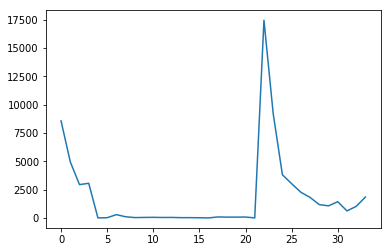

In [458]:
plt.plot(weights)
plt.show()

In [7]:
gr_V = np.load("../data/graphs/Vesuvious_III.npy")

In [10]:
components_V = {}
name_V = 0

In [44]:
name_V = next_edge(gr_V[:, :], components_V, name_V)


A Jupyter Widget

In [12]:
chain = np.array(components_V[0].chain)
#np.save("../data/graphs/slo_main_chain_22", chain)

In [15]:
weights = []
for i,j in zip(chain[:-1] , chain[1:]):
    weights.append(gr_V[i,j])
weights = np.array(weights).astype(int)

In [18]:
weights > 0

array([False, False, False, ..., False, False, False])

In [24]:
all_cass = pickle.load(open("../data/dicts/Sasha_chains_old_22", 'rb'))

In [25]:
all_cass

[array([58, 40,  5,  4, 12,  2,  0,  1,  3, 25, 53, 69, 76]),
 array([42, 21, 14,  6,  9]),
 array([32, 13, 23, 33, 39, 44, 38, 30, 11,  7,  8, 19, 26, 35, 52, 64, 47,
        36, 15, 10, 18, 17, 28, 50]),
 array([48, 24, 16, 41]),
 array([71, 27, 20, 43, 49, 45, 37, 29, 22, 46]),
 array([75, 62, 34, 31, 51, 55, 67]),
 array([63, 57, 66, 56, 54, 73]),
 array([72, 61, 59, 60, 70, 77, 78]),
 array([68, 65, 74]),
 array([79]),
 array([80])]

In [29]:
all_cass, all_cass_w = split(chain, weights)

In [35]:
max(weights)

2883

In [43]:
[(x) for x in enumerate(zip(all_cass, all_cass_w)) if x[1][0].shape[0] > 1 and max(x[1][1]) > 5]

[(6, (array([442, 322, 325]), array([0, 1, 6]))),
 (16,
  (array([438, 461, 370, 192, 168, 257]), array([ 0,  1,  1,  6, 20, 14]))),
 (45, (array([214, 167, 147, 172, 349]), array([ 0, 10, 24, 12,  4]))),
 (67,
  (array([449, 277, 231, 273, 187, 196, 320]),
   array([ 0,  1,  1,  6,  9, 28,  4]))),
 (74,
  (array([481, 333, 302, 291, 361, 336, 315, 542]),
   array([0, 1, 1, 5, 1, 2, 6, 1]))),
 (81, (array([598, 132,  79,  52,  66,  99,  62,   1,   4,  13,  11,  18,  24,
           42,  28,  65,  15,  23,  43,   9,   6,   8,  10,   2,   5,  33,
           49,  19,  47,  46,  37,  55, 102,  16,  31,  30,  41,  21,  20,
           38, 594]),
   array([   0,    1,   71,  425,  386,    5,  102,   44, 2849, 1236, 1207,
          1401,  445,  349,  540,  270,  233,  773,  269,  612, 1539, 2144,
          1174,   54, 2883, 1130,  253,  419,  591,  198,  434,  512,  179,
            87,  708,  572,  495,  473,  839,  653,    5]))),
 (106, (array([944, 136, 140, 129, 124]), array([ 0,  1, 27, 12

In [40]:
print(all_cass[81])
print(all_cass[596])

[598 132  79  52  66  99  62   1   4  13  11  18  24  42  28  65  15  23
  43   9   6   8  10   2   5  33  49  19  47  46  37  55 102  16  31  30
  41  21  20  38 594]
[545  82  70  64  51  61  75 137  78  74  88  87  85  89 106  72  56  32
  54 145  86  84  73  69  63  45  77  44  17  14  22  50  36  48  40   0
   3  12  35  39  27  80  91  92  68  59  29  53  26  25  81  57   7  34
  58  67  60  83 262 338]


In [39]:
for i in all_cass[81]:
    for j in all_cass[596]:
        print(i,j,gr_V[i,j], gr_V[j,i])

598 545 0.0 0.0
598 82 0.0 0.0
598 70 0.0 0.0
598 64 0.0 0.0
598 51 0.0 0.0
598 61 0.0 0.0
598 75 0.0 0.0
598 137 0.0 0.0
598 78 0.0 0.0
598 74 0.0 0.0
598 88 0.0 0.0
598 87 0.0 0.0
598 85 0.0 0.0
598 89 0.0 0.0
598 106 0.0 0.0
598 72 0.0 0.0
598 56 0.0 0.0
598 32 0.0 0.0
598 54 1.0 0.0
598 145 0.0 0.0
598 86 0.0 0.0
598 84 0.0 0.0
598 73 0.0 0.0
598 69 0.0 0.0
598 63 0.0 0.0
598 45 0.0 0.0
598 77 0.0 0.0
598 44 0.0 0.0
598 17 0.0 0.0
598 14 0.0 0.0
598 22 0.0 0.0
598 50 0.0 0.0
598 36 0.0 0.0
598 48 0.0 0.0
598 40 0.0 0.0
598 0 0.0 0.0
598 3 0.0 0.0
598 12 0.0 0.0
598 35 0.0 0.0
598 39 0.0 0.0
598 27 0.0 0.0
598 80 0.0 0.0
598 91 0.0 0.0
598 92 0.0 0.0
598 68 0.0 0.0
598 59 0.0 0.0
598 29 0.0 0.0
598 53 0.0 0.0
598 26 0.0 0.0
598 25 0.0 0.0
598 81 0.0 0.0
598 57 0.0 0.0
598 7 0.0 0.0
598 34 0.0 0.0
598 58 0.0 0.0
598 67 0.0 0.0
598 60 0.0 0.0
598 83 0.0 0.0
598 262 0.0 0.0
598 338 0.0 0.0
132 545 0.0 0.0
132 82 0.0 0.0
132 70 0.0 1.0
132 64 0.0 2.0
132 51 2.0 0.0
132 61 0.0 1.0
132 75

65 61 3.0 3.0
65 75 2.0 3.0
65 137 1.0 0.0
65 78 8.0 5.0
65 74 1.0 1.0
65 88 1.0 1.0
65 87 2.0 0.0
65 85 0.0 2.0
65 89 1.0 5.0
65 106 2.0 0.0
65 72 5.0 3.0
65 56 5.0 5.0
65 32 20.0 6.0
65 54 6.0 4.0
65 145 1.0 0.0
65 86 0.0 2.0
65 84 1.0 6.0
65 73 2.0 7.0
65 69 1.0 6.0
65 63 6.0 1.0
65 45 6.0 10.0
65 77 4.0 2.0
65 44 9.0 8.0
65 17 18.0 12.0
65 14 13.0 14.0
65 22 10.0 16.0
65 50 2.0 6.0
65 36 1.0 6.0
65 48 7.0 4.0
65 40 11.0 2.0
65 0 20.0 33.0
65 3 9.0 12.0
65 12 12.0 8.0
65 35 4.0 12.0
65 39 8.0 17.0
65 27 12.0 4.0
65 80 2.0 2.0
65 91 1.0 1.0
65 92 3.0 4.0
65 68 2.0 4.0
65 59 5.0 4.0
65 29 4.0 9.0
65 53 6.0 6.0
65 26 7.0 11.0
65 25 5.0 8.0
65 81 4.0 8.0
65 57 4.0 1.0
65 7 20.0 36.0
65 34 5.0 10.0
65 58 1.0 6.0
65 67 9.0 3.0
65 60 2.0 3.0
65 83 2.0 1.0
65 262 0.0 0.0
65 338 0.0 0.0
15 545 0.0 0.0
15 82 5.0 10.0
15 70 11.0 13.0
15 64 8.0 9.0
15 51 16.0 20.0
15 61 9.0 27.0
15 75 14.0 17.0
15 137 0.0 0.0
15 78 1.0 14.0
15 74 12.0 10.0
15 88 6.0 6.0
15 87 6.0 3.0
15 85 3.0 11.0
15 89 6.0 3.

16 145 1.0 1.0
16 86 3.0 7.0
16 84 10.0 11.0
16 73 14.0 4.0
16 69 12.0 6.0
16 63 18.0 9.0
16 45 33.0 29.0
16 77 5.0 3.0
16 44 16.0 12.0
16 17 28.0 24.0
16 14 34.0 40.0
16 22 43.0 19.0
16 50 22.0 8.0
16 36 17.0 19.0
16 48 16.0 7.0
16 40 22.0 13.0
16 0 75.0 60.0
16 3 31.0 33.0
16 12 37.0 26.0
16 35 30.0 12.0
16 39 10.0 35.0
16 27 20.0 20.0
16 80 5.0 3.0
16 91 3.0 5.0
16 92 5.0 4.0
16 68 23.0 7.0
16 59 7.0 9.0
16 29 21.0 31.0
16 53 13.0 7.0
16 26 22.0 14.0
16 25 18.0 22.0
16 81 9.0 6.0
16 57 9.0 8.0
16 7 72.0 84.0
16 34 15.0 23.0
16 58 11.0 19.0
16 67 11.0 15.0
16 60 8.0 11.0
16 83 14.0 4.0
16 262 0.0 0.0
16 338 0.0 0.0
31 545 0.0 0.0
31 82 7.0 9.0
31 70 10.0 4.0
31 64 6.0 7.0
31 51 8.0 12.0
31 61 9.0 13.0
31 75 6.0 8.0
31 137 0.0 0.0
31 78 4.0 9.0
31 74 7.0 5.0
31 88 8.0 1.0
31 87 4.0 2.0
31 85 6.0 5.0
31 89 3.0 2.0
31 106 1.0 1.0
31 72 5.0 16.0
31 56 4.0 6.0
31 32 16.0 23.0
31 54 20.0 6.0
31 145 1.0 0.0
31 86 8.0 10.0
31 84 8.0 4.0
31 73 4.0 7.0
31 69 4.0 11.0
31 63 7.0 12.0
31 45 22.0 

In [28]:
def split(chain, weights):
    splits = np.where(weights == 0)[0] 
    return np.split(chain, splits + 1), np.split(weights, splits)
    

In [496]:
a_in_b([3,0,5], chain)

False

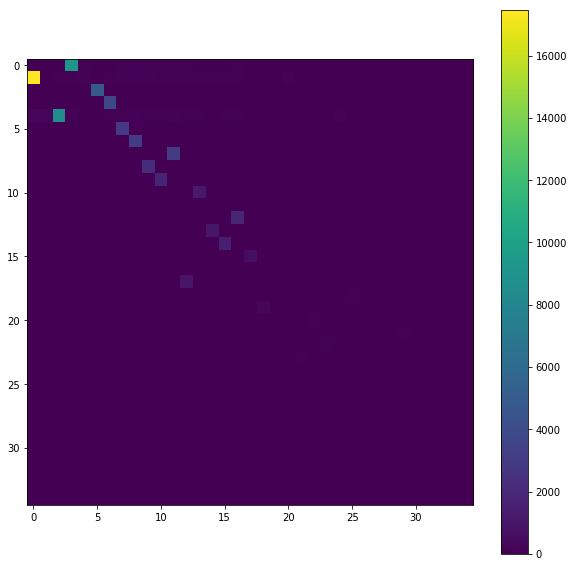

In [14]:
plot_gr(gr_ES, log=0)

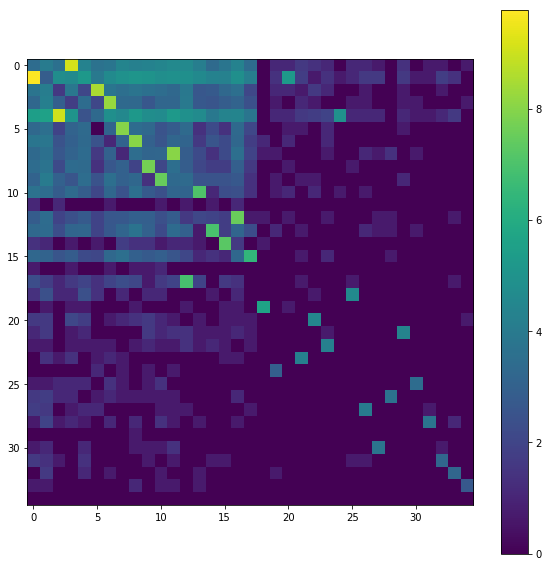

In [13]:
plot_gr(gr_ES, log=1)

In [12]:
n_to_cl = pickle.load(open("../data/dicts/ES3_n_to_cl", 'rb'))
cl_to_n = pickle.load(open("../data/dicts/ES3_cl_to_n", 'rb'))
nd = pickle.load(open("../data/dicts/ES3_nd", 'rb'))

In [516]:
n_to_cl[4]

'CAAGTGATATCCATCATCGCATCCAGTGCGC'

In [520]:
for i in [4,2,5,7]:
    print(n_to_cl[i])

CAAGTGATATCCATCATCGCATCCAGTGCGC
AGTGCTGGACCATTTCAAATTCACAATAGAT
GGAATGATATTTCAATAAATAATTATAACAA
CCCTCACACCGATTCGCCAAACGGTGGAGAA


In [521]:
for i in [1,0,3,6]:
    print(n_to_cl[i])

GACAGAACGGCCTCAGTAGTCTCGTCAGGCT
ACACGCCCTTATCAAATAGCTGTGATTTACC
ATAGACCCCGAACAACAATACGCGCAAACCG
TACCGTACAGACTGCCGGATATTATTTTTTT


In [523]:
for i in range(6):
    print(nd[n_to_cl[i]])

28374
20414
14353
13974
11315
8389


In [281]:
all_cass

{0: [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 2: [4, 2, 5, 7, 11],
 4: [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 6: [20, 22, 23, 21, 29]}

In [13]:
weights = []
for i,j in zip(chain[:-1] , chain[1:]):
    weights.append(gr_ES[i,j])
    
weights = np.array(weights).astype(int)

In [14]:
[x for x in zip(np.array(chain), weights)]

[(4, 8568),
 (2, 4956),
 (5, 2941),
 (7, 3059),
 (11, 0),
 (24, 18),
 (19, 289),
 (18, 102),
 (25, 30),
 (30, 42),
 (27, 52),
 (26, 38),
 (28, 42),
 (31, 24),
 (32, 24),
 (33, 14),
 (34, 0),
 (20, 86),
 (22, 69),
 (23, 69),
 (21, 77),
 (29, 0),
 (1, 17455),
 (0, 9224),
 (3, 3815),
 (6, 3022),
 (8, 2268),
 (9, 1809),
 (10, 1174),
 (13, 1067),
 (14, 1432),
 (15, 619),
 (17, 1019),
 (12, 1845)]

In [15]:
s_0 = [1, 0, 3, 6, 8, 9]
s_1 = [4,2,5,7,11]
s_2 = [24, 19, 18, 25, 30]
s_3 = [20, 22, 23, 21, 29]
for i in s_0:
    for j in s_3:
        print(i,j,gr_ES[i,j], gr_ES[j,i])

1 20 191.0 4.0
1 22 1.0 1.0
1 23 3.0 3.0
1 21 5.0 4.0
1 29 4.0 0.0
0 20 2.0 4.0
0 22 3.0 1.0
0 23 2.0 0.0
0 21 4.0 2.0
0 29 3.0 0.0
3 20 0.0 7.0
3 22 1.0 1.0
3 23 0.0 3.0
3 21 2.0 1.0
3 29 1.0 0.0
6 20 2.0 1.0
6 22 0.0 1.0
6 23 2.0 2.0
6 21 0.0 0.0
6 29 0.0 0.0
8 20 1.0 3.0
8 22 0.0 1.0
8 23 0.0 0.0
8 21 0.0 0.0
8 29 0.0 1.0
9 20 0.0 4.0
9 22 1.0 2.0
9 23 0.0 0.0
9 21 1.0 4.0
9 29 2.0 0.0


In [542]:
gr_ES[3,0]

25.0

In [49]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

In [111]:
def plot_group(*args, s = 7):
    n = len(args) // 2
    
    plt.figure(figsize=(s,s/2))
    #f, a = plt.subplots(1, n,figsize=(s,s))
    gs = gridspec.GridSpec(1, 2 * n, width_ratios=[1, 1/15] * (n), height_ratios=[1], wspace = 0.25) 
    #f.set_figsize((s,s))
    t=["A","B"]
    for i in range(n):
        ax = plt.subplot(gs[2*i])
        im = args[2*i]
        if args[2*i + 1]:
            im = np.log(im + 1)
        
        plt.sca(ax)
        plt.title(t[i], size = 20)
        imsh = plt.imshow(im)
        cax = plt.subplot(gs[2*i + 1])
        plt.colorbar(imsh, cax = cax)
        
        
        
#         divider = make_axes_locatable(ax)
#         if i == n- 1:
#             cax = divider.append_axes("right", size="5%", pad=0.05)
#             plt.colorbar(imsh, cax = cax)
#         else:
#             cax = divider.append_axes("left", size="5%", pad=0.05)
#             plt.colorbar(imsh, cax = cax)
    
        
    plt.show()

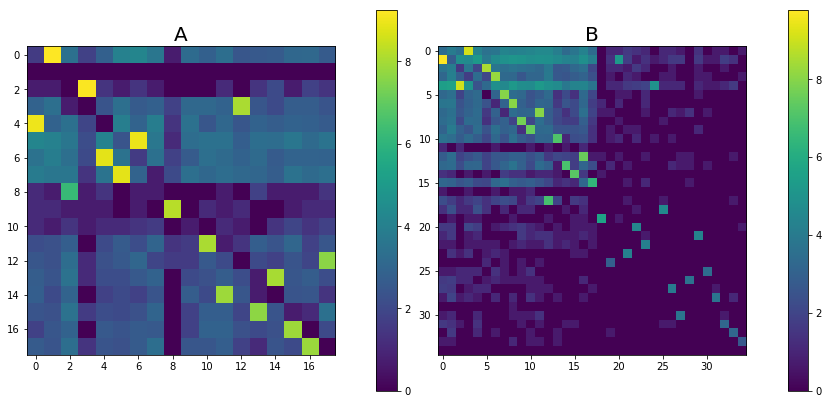

In [113]:
plot_group(np.load("../../data/graphs/ES1.npy")[:18,:18],
           1,
           np.load("../../data/graphs/ES3_22.npy")[:35,:35],
           1, 
            s = 14)

In [52]:
[1] * n-1 + [1/4]

NameError: name 'n' is not defined

In [71]:
X = np.load("../X.npy")

In [72]:
X.shape

(1000, 35, 35)

In [73]:
X_s = X.sum(0)

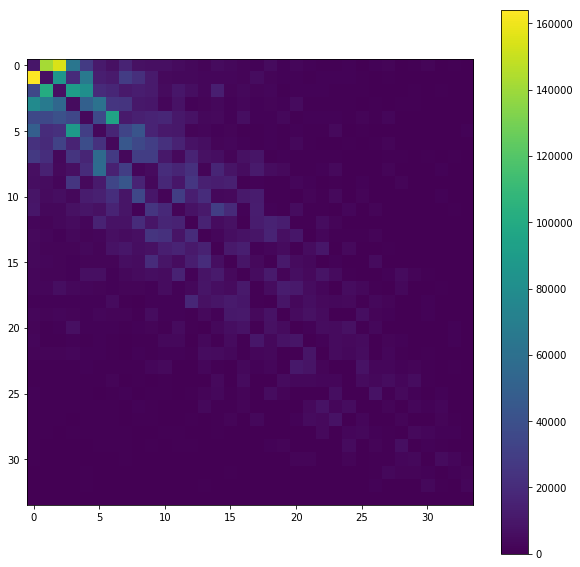

In [78]:
plot_gr(X_s[:34,:34])